# Coherence

Coherence is a performance criteria of a sensing matrix.
Coherence is more practical than RIP.
It is correlation between a column of sensing matrix and other column of it.
This will be important when we think some types of performance gurantees.

## Definition

Coherence of a sensing matrix $A$ is...

$ \mu(A) = \max\limits_{1 \leq i \neq j \leq N} |\langle a_i, a_j \rangle| $

where $a_i,...,a_N$ are $l_2$-normalized columns of sensing matrix $A$.


-------------

## Coherence samples of various types of matrix


### 1. Identity matrix

At first, we make identity matrix.

In [2]:
import numpy as np
from CSToolbox.evaluator import coherence


A = np.eye(5, 5)

print A
print
print "coherence: ", coherence(A)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]

coherence:  0.0


Coherence of identity matrix is zero, because all columns of a identity matrix are orthogonal each other.
This is minimum value of coherence.
On the contrary, let's consider matrix which of all elements are same value, for example, all elements are one as below.

In [3]:
m, n = 5, 18

A = np.ones([m,n])
print A
print
print "coherence: ", coherence(A)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]

coherence:  1.0


In this situation, coherence is one, which is maximum value.
This means there is any columns are completely coherent.

### 2. Gaussian and sub-gaussian matrix.

In [4]:
from CSToolbox.sensing_matrix import gaussian, subgaussian

sG = subgaussian(m, n)
G  = gaussian(m,n)

print "coherenece of sG: ", coherence(sG)
print "coherenece of  G: ", coherence(G)

coherenece of sG:  0.934806698855
coherenece of  G:  0.853638780544


### 3. Bernoulli matrix

In [5]:
from CSToolbox.sensing_matrix import bernoulli

B = bernoulli(m, n)

print B
print 
print "coherene of B: ", coherence(B)

[[0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1]
 [1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1]
 [1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1]
 [1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0]]

coherene of B:  1.0


If a bernoulli matrix have small number of rows, coherence may be large.
Because same columns likely to be generated.

-------------

## The relationship between the number of columns and the number of rows

* Keep the compression rate $\alpha~(=m/n)$ equals 0.1.

In [6]:
alpha = 0.1

### 1. cohenerence $\mu$ and the number of rows $m$

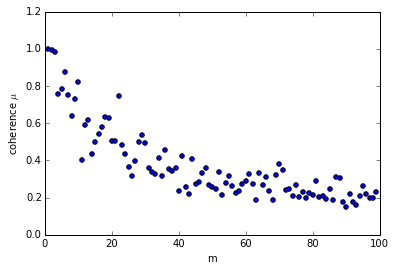

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


m_min  = 1
m_max  = 100
n      = 10

for m in np.arange(m_min, m_max):
    A = gaussian(m, n)
    mu = coherence(A)
    plt.scatter(m, mu)

plt.xlabel('m')
plt.xlim(0, m_max)
plt.ylabel(r'coherence $\mu$')
plt.show()

It seems that less columns the matrix has, smaller the coherence is.

### 2. cohenerence $\mu$ and the number of columns $n$

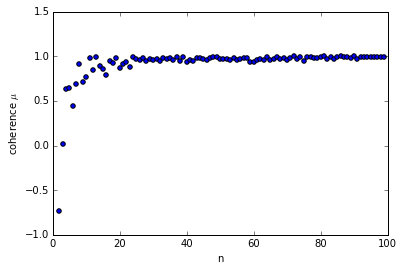

In [15]:
n_min  = 2
n_max  = 100
m      = 5

for n in np.arange(n_min, n_max):
    A = gaussian(m, n)
    mu = coherence(A)
    plt.scatter(n, mu)

plt.xlabel('n')
plt.xlim(0, n_max)
plt.ylabel(r'coherence $\mu$')
plt.show()

It seems $n$ does hardly affect the coherence.
Except for too small $n$ compared with $m$, compression rate $\rho(m/n)$ is less than 20%.